In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import lightgbm as lgb
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox
from scipy.stats import mode

%matplotlib inline

In [3]:
df = pd.read_csv('/home/kamanshu/Downloads/Resume - Projects/Big Mart Sales Prediction/Data/Train.csv')


In [4]:
df1 = df.copy()

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].mean()

12.857645184135976

In [10]:
# filling missing values with mean of data for Weight column

df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)


In [11]:
mode_of_outlet_size = df.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',
                                                aggfunc=(lambda x : mode(x.dropna()).mode[0]))

/tmp/ipykernel_23508/1161562702.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  aggfunc=(lambda x : mode(x.dropna()).mode[0]))


#### We can also write this for easy undestanding of above code of pivot tables atrributes of (values = 'Outlet_Size', index = 'Outlet_Type')

df1[['Outlet_Type','Outlet_Size']].value_counts()

     Outlet_Type        Outlet_Size
     Supermarket Type1  Small          1860
     Supermarket Type3  Medium          935
     Supermarket Type1  High            932
                       Medium          930
     Supermarket Type2  Medium          928
     Grocery Store      Small           528
     dtype: int64
     
#### Lamba function is taking values from Outet_Size and checking if it is null or not. If null then drop othewise find mode 

In [12]:
mode_of_outlet_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [13]:
missing_values = df['Outlet_Size'].isnull()

In [14]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size.loc[x])

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
sns.set()

<Figure size 600x600 with 0 Axes>

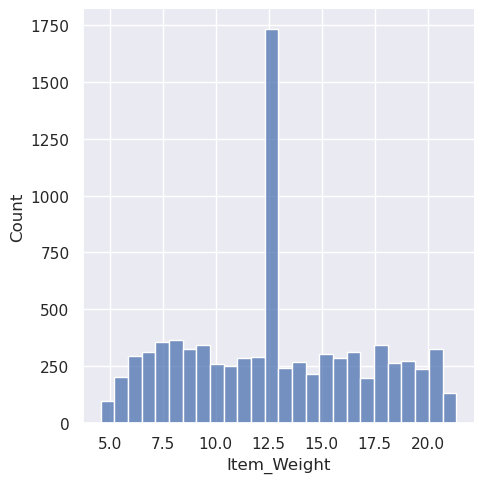

In [20]:
# Item Weight Distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

In [21]:
print("Skew of raw data: %f" % df['Item_Weight'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Item_Weight'],fisher = False)) #check kurtosis

Skew of raw data: 0.090561
Kurtosis of raw data: 2.139506


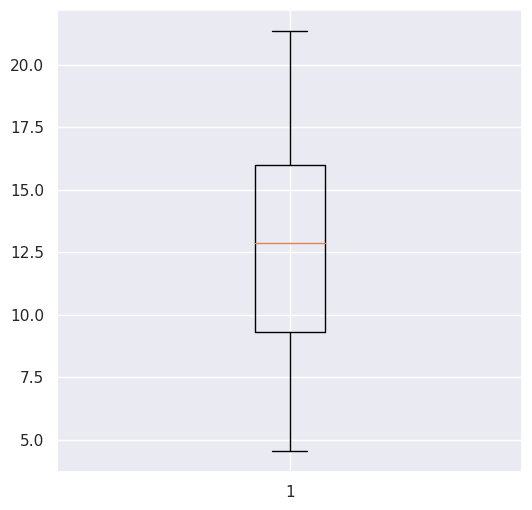

In [22]:
plt.figure(figsize=(6,6))
plt.boxplot(df['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

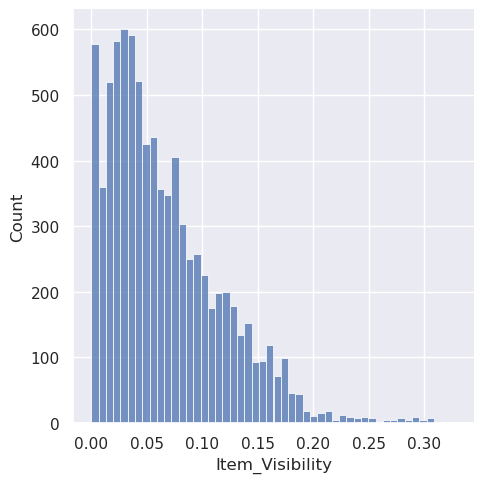

In [23]:
# Product Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])

In [24]:
print("Skew of raw data: %f" % df['Item_Visibility'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Item_Visibility'],fisher = False)) #check kurtosis

Skew of raw data: 1.167091
Kurtosis of raw data: 4.677757


Skew after sqrt Transformation: -0.098056
Kurtosis after sqrt Transformation: 2.962391


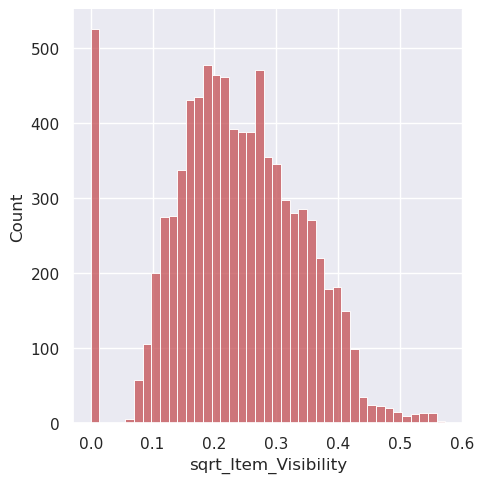

In [25]:
#sqrt transformation
df['sqrt_Item_Visibility'] = np.sqrt(df['Item_Visibility']) 

#check distribution,skewness and kurtosis
sns.displot(df['sqrt_Item_Visibility'],color ="r")
print("Skew after sqrt Transformation: %f" % df['sqrt_Item_Visibility'].skew())
print("Kurtosis after sqrt Transformation: %f" % kurtosis(df['sqrt_Item_Visibility'],fisher = False))
# df['sqrt_Item_Weight'].describe()

In [26]:
df1 = df.copy()

In [27]:
drop_visibility =  df1[df1['sqrt_Item_Visibility'] == 0]

In [28]:
drop_visibility.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'sqrt_Item_Visibility'],
      dtype='object')

In [29]:
# df1 = df.copy()

In [30]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.000000
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.238293
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,0.216754
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.187580
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.381078


In [31]:
droped_index = df1[df1['sqrt_Item_Visibility']==0].index

In [32]:
droped_index.shape

(526,)

In [33]:
df1.drop(droped_index)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0.112876
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,0.357029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.238293
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,0.216754
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.187580
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.381078


In [34]:
new_df_mean = df1['sqrt_Item_Visibility'].mean()
new_df_mean

0.23370912853518144

In [35]:
df.loc[df['sqrt_Item_Visibility'] == 0, 'sqrt_Item_Visibility'] = new_df_mean
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.233709
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.233709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.238293
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,0.216754
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.187580
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.381078


<Figure size 600x600 with 0 Axes>

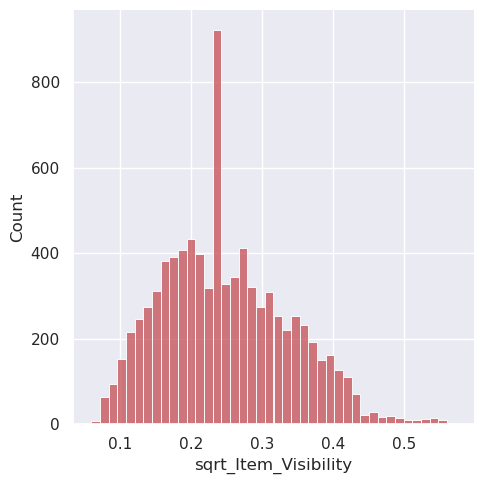

In [36]:
plt.figure(figsize=(6,6))
sns.displot(df['sqrt_Item_Visibility'],color ="r")
plt.show()

<Figure size 600x600 with 0 Axes>

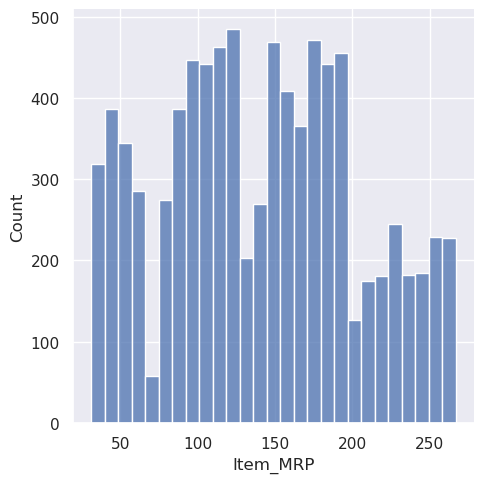

In [37]:
# MRP distribution 
plt.figure(figsize = (6,6))
sns.displot(df['Item_MRP'])
plt.show()

In [38]:
print("Skew of raw data: %f" % df['Item_MRP'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Item_MRP'],fisher = False)) #check kurtosis

Skew of raw data: 0.127202
Kurtosis of raw data: 2.110049


In [39]:
transformed_data, best_lambda = st.boxcox(df1['Item_Outlet_Sales'])
df1['bc_Item_Outlet_Sales'] = transformed_data

# Print the optimal lambda value
print("Optimal lambda:", best_lambda)

# Print the transformed data
print("Transformed data:", transformed_data)

# sns.displot(df1['cbrt_Item_Outlet_Sales'], color='r')
print('Skew after cbrt transformation: {}'.format(df1['bc_Item_Outlet_Sales'].skew()))
# print('Kurtosis after cbrt transformation: {}'.format(kurtosis(df1['cbrt_Item_Outlet_Sales'], fisher=False)))

Optimal lambda: 0.34647755754885007
Transformed data: [47.00788505 20.95829445 37.96489323 ... 30.71278953 36.19502607
 25.92628684]
Skew after cbrt transformation: -0.07497811874852083


<Figure size 600x600 with 0 Axes>

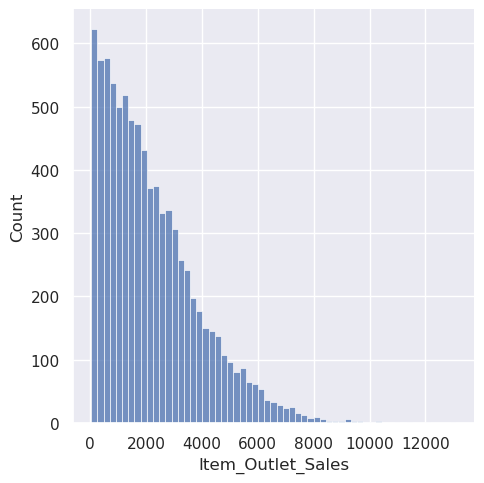

In [40]:
# OutletSales distribution 
plt.figure(figsize = (6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

In [41]:
print('Skew of raw data: {}'.format(df1['Item_Outlet_Sales'].skew()))
print('Kurtosis of raw data: {}'.format(kurtosis(df1['Item_Outlet_Sales'], fisher=False)))

Skew of raw data: 1.1775306028542796
Kurtosis of raw data: 4.614224991590342


Skew after sqrt transformation: 0.23467599347099247
Kurtosis after sqrt transformation: 2.5502656014725633


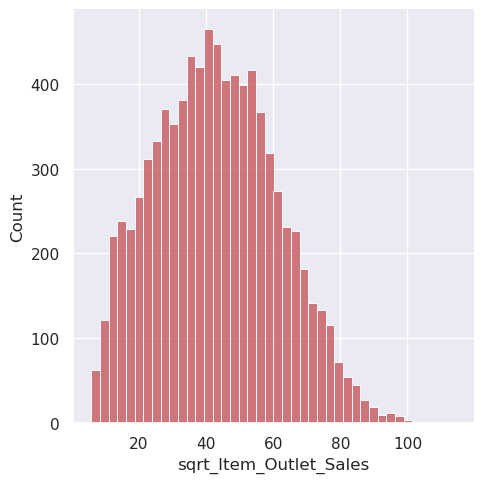

In [42]:
df1['sqrt_Item_Outlet_Sales'] = np.sqrt(df1['Item_Outlet_Sales'])

sns.displot(df1['sqrt_Item_Outlet_Sales'], color='r')
print('Skew after sqrt transformation: {}'.format(df1['sqrt_Item_Outlet_Sales'].skew()))
print('Kurtosis after sqrt transformation: {}'.format(kurtosis(df1['sqrt_Item_Outlet_Sales'], fisher=False)))

Skew after cbrt transformation: -0.10250699736722722
Kurtosis after cbrt transformation: 2.46731824421294


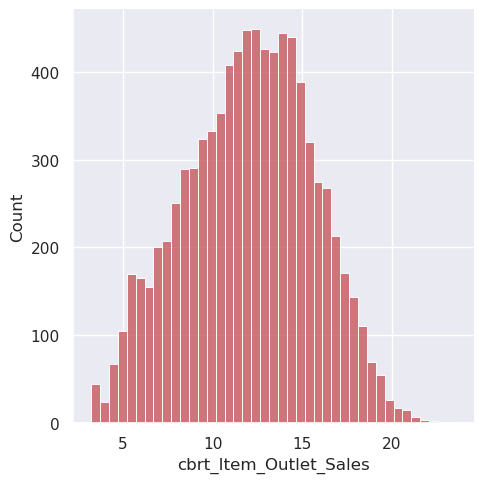

In [43]:
df1['cbrt_Item_Outlet_Sales'] = np.cbrt(df1['Item_Outlet_Sales'])

sns.displot(df1['cbrt_Item_Outlet_Sales'], color='r')
print('Skew after cbrt transformation: {}'.format(df1['cbrt_Item_Outlet_Sales'].skew()))
print('Kurtosis after cbrt transformation: {}'.format(kurtosis(df1['cbrt_Item_Outlet_Sales'], fisher=False)))

In [44]:
df1.drop(columns='sqrt_Item_Outlet_Sales')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility,bc_Item_Outlet_Sales,cbrt_Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,47.007885,15.515611
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,20.958294,7.625576
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,37.964893,12.800240
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.000000,25.485930,9.013888
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000,28.660858,9.982319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.238293,42.145847,14.058233
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,0.216754,22.794301,8.189661
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.187580,30.712790,10.606219
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.381078,36.195026,12.266265


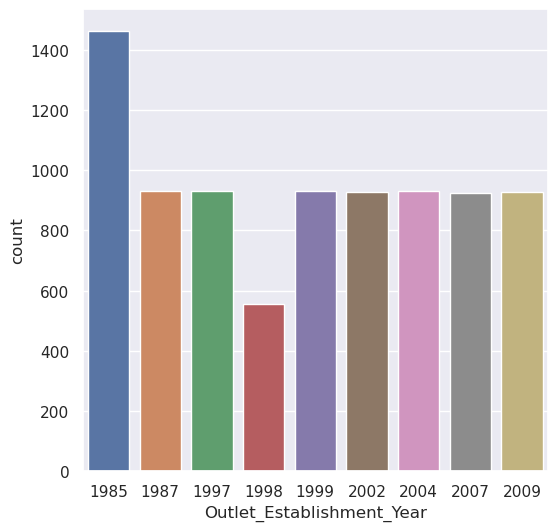

In [45]:
# Outlet Establishment Year
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Establishment_Year',data = df)
plt.show()

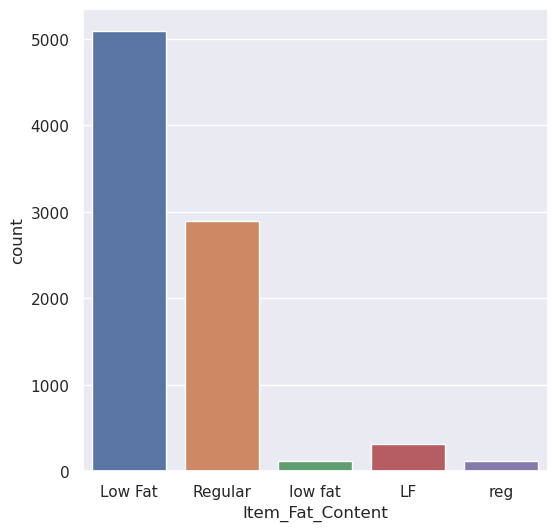

In [46]:
# FatContent
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content',data = df)
plt.show()

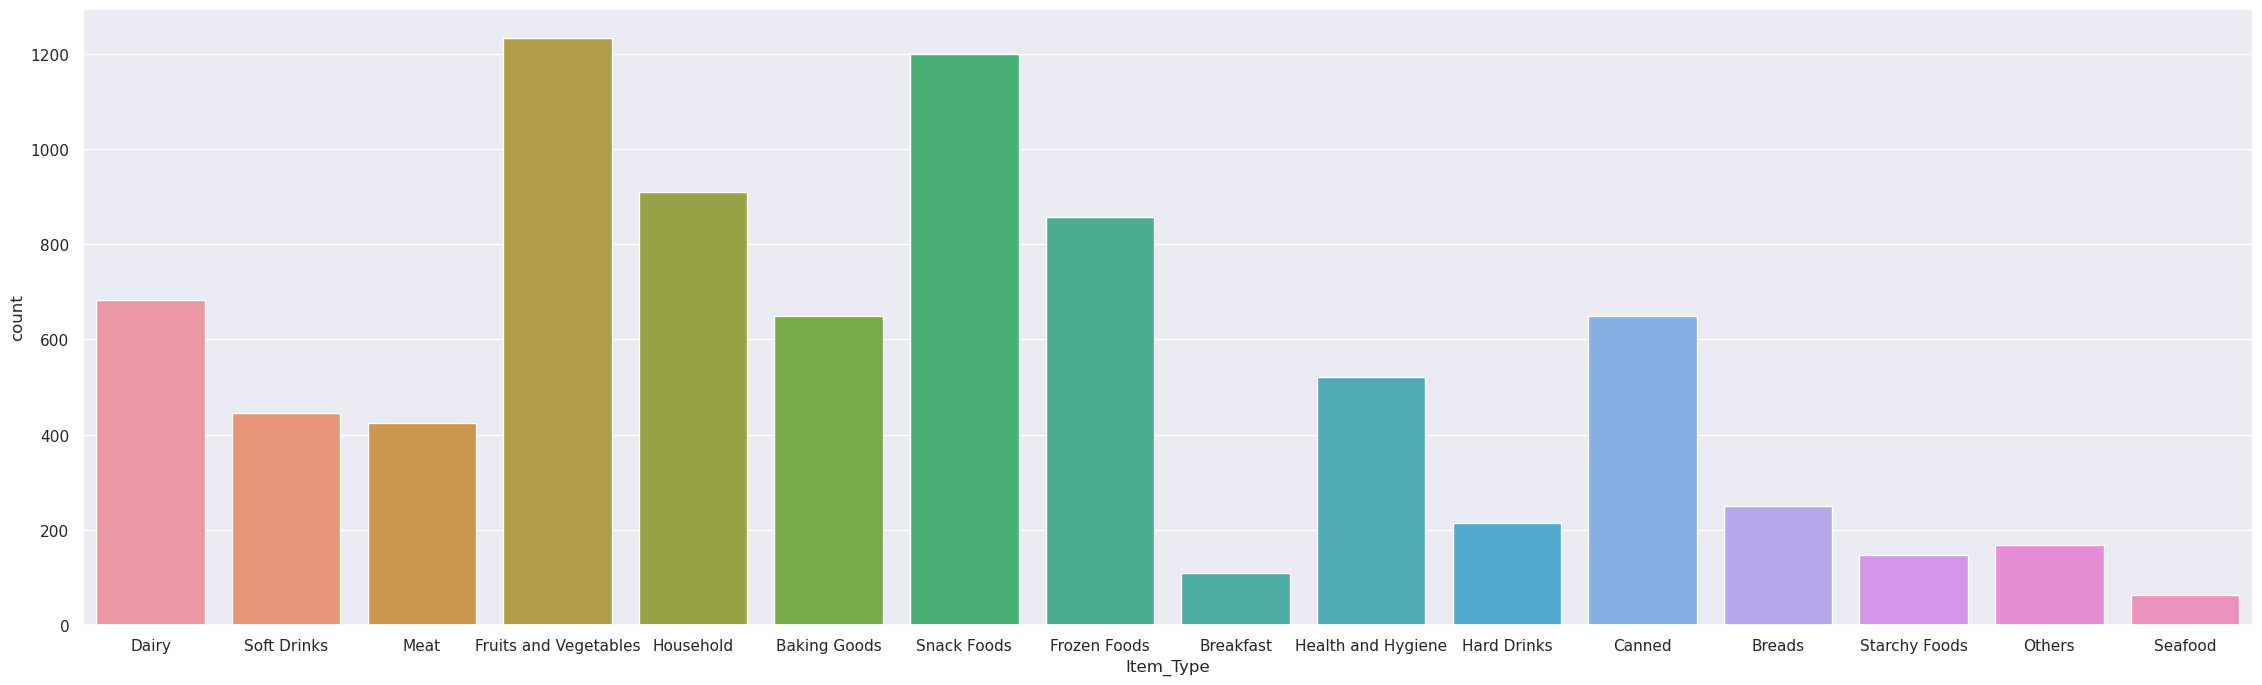

In [47]:
# ProductType
plt.figure(figsize = (28,8))
sns.countplot(x ='Item_Type',data = df)
plt.show()

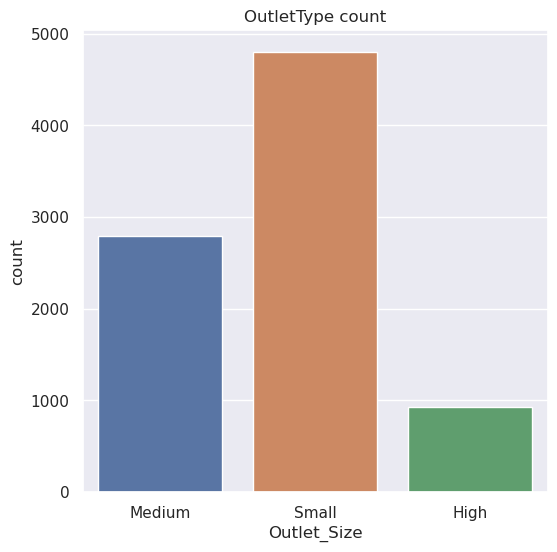

In [48]:
# OutletSize
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Size',data = df)
plt.title('OutletType count')
plt.show()

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.233709
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.233709


In [50]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [51]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [52]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'sqrt_Item_Visibility'],
      dtype='object')

In [54]:
# df.drop(columns=['Item_Visibility','cbrt_Item_Visibility','log_Item_Visibility'], inplace=True)

In [55]:
encoder = LabelEncoder()

In [56]:
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sqrt_Item_Visibility
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,0.126678
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0.138846
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,0.129461
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,0.233709
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,0.233709


In [58]:
sc = StandardScaler()

In [59]:
X = df.drop(columns = 'Item_Outlet_Sales',axis = 1)
y = df["Item_Outlet_Sales"]

In [60]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,sqrt_Item_Visibility
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,0.126678
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,0.138846
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,0.129461
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,0.233709
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,0.233709
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,0.238293
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,0.216754
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,0.187580
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,0.381078


In [61]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(8523, 12) (6818, 12) (1705, 12)


In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
model = XGBRegressor(n_estimators = 750,learning_rate = 0.007)

In [65]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.007, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred_train = model.predict(X_train)

In [70]:
# R squared value
r2_train = metrics.r2_score(y_train,y_pred_train)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6818719275826479


In [71]:
# test data prediction
test_data_prediction = model.predict(X_test)

In [72]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.599634997543742


In [80]:
import joblib

In [81]:
joblib.dump(model, "Retail_predictor")

['Retail_predictor']